# Modelowanie - warsztaty, zajęcia 06

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

# Analiza obrazu

Sieci neuronowe są bardzo często wykorzystywane do analizy obrazu albo dźwięku. Nie wykorzystuje się wtedy zwykłych sieci sekwencyjnych o połączeniach każdy z każdym:
* do analizy obrazu używa się splotowych (*konwolucyjnych*) sieci neuronowych (*convolutional neural networks*, **CNN**)
* do analizy dźwięku używa się sieci rekurencyjnych (*recurrent neural networks*, **RNN**)

Najczęściej zabawę z sieciami splotowymi i analizą obrazu zaczyna się od rozpoznawania cyfr. My jednak zrobimy coś nieco ciekawszego/zabawniejszego, pobawimy się w rozpoznawanie czy na zdjęciu jest pies czy kot.  
Potrzebne do tego dane znajdziecie tutaj: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition  
W zakładce `data` na tej stronie są do ściągnięcia dwa pliki `train.zip` oraz `test.zip`. Ściągnij tylko `train.zip`, a następnie rozpakuj do folderu, w którym znajduje się ten notebook do folderu `psy_vs_koty`, podfolderu `train`.
Ściąganie plików może trochę potrwać, więc jeżeli robisz to ćwiczenie siedząc w sali na zajęciach, szybciej będzie Ci poprosić prowadzącego o pendrive'a z danymi albo ściągnąć dane z dysku sieciowego (jeżeli masz do niego dostęp).

In [3]:
from keras.preprocessing.image import load_img, img_to_array

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Wczytujemy nazwy plików graficznych:

In [69]:
import os

img_dir = r'psy_vs_koty/train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [70]:
full_images = [os.path.join(img_dir, img) for img in images]

Wyświetlamy zdjęcie:

Text(0.5,1,'cat.4582.jpg')

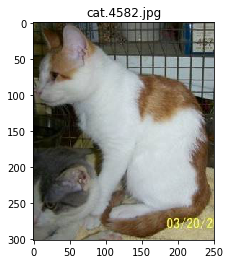

In [6]:
image_index = 6482
img = load_img(full_images[image_index])
plt.imshow(img)
plt.title(images[image_index])

Zmień kod poniżej aby wczytać inne zdjęcie. Zrób tak kilka razy aby przejrzeć różne zdjęcia. 
* Od którego indeksu `image_index` zaczynają się zdjęcia psów?
* Do datasetu, z którego korzystamy zgłaszane były problemy. Sprawdź pliki omawiane w komentarzach poniżej:
  > Image cat.7377.jpg is labelled as a cat. However it is a person. Not a dog, not a cat. Why is it in the data?
  
  oraz:
  
  > Unless there is a cat in 1 pixel of this image I can't see, image cat.4085.jpg is clearly a dog to me.

Text(0.5,1,'cat.4085.jpg')

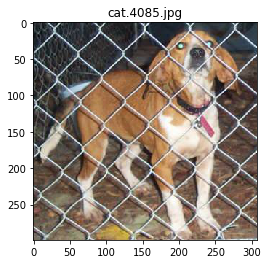

In [16]:
image_index = 5930
img = load_img(full_images[image_index])
plt.imshow(img)
plt.title(images[image_index])

Każde zdjęcie ma nie tylko szerokość i wysokość - składa się z trzech warstw dla czerwonego (**R**), zielongego (**G**) oraz niebieskiego (**B**) koloru. Stwórz poniżej z obrazu znajdującego się w zmiennej `img` macierz, za pomocą wczytanej już funkcji `img_to_array` - wynik zapisz w zmiennej `img_arr`. Następnie sprawdź wielkość macierzy `img_arr`:

In [ ]:
_______ = ____________(___)
print(_______._____)

Wyświetlmy teraz sobie oddzielnie warstwy R, G i B:

(-0.5, 307.5, 298.5, -0.5)

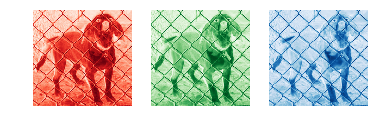

In [27]:
fig, ax = plt.subplots(ncols=3)

# wysujemy po kolei warstwy:
ax[0].imshow(img_arr[:, :, 0], cmap='Reds')
ax[1].imshow(img_arr[:, :, 1], cmap='Greens')
ax[2].imshow(img_arr[:, :, 2], cmap='Blues')

# wyłączamy oznaczenia osi:
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

Zwróć uwagę na to, że zdjęcia treningowe są w różnych rozmiarach, musimy je więc przekształcić wszystkie na ten sam rozmiar (sieć musi za każdym razem mieć taką samą wielkość danych wejściowych). Ponadto aby oszczędzić czasu na treningu zredukujemy zdjęcia do rozmiaru 50 na 50 pikseli. Korzystamy z `target_size` w kodzie poniżej aby wyświetlić pomniejszony obraz (chcemy 50 na 50 pikseli):

Text(0.5,1,'dog.10121.jpg')

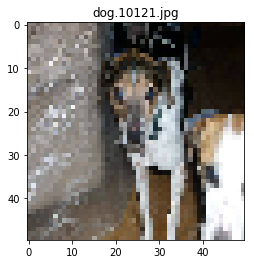

In [9]:
image_index = 12639
img = load_img(full_images[image_index], target_size=(__, __))
plt.imshow(img)
plt.title(images[image_index])

## Convolution
**Splot** to operacja, z którą już mieliście do czynienia na analizie danych eeg. Filtrowanie sygnału, czy też analiza czas częstość wykorzystuje operację splotu. Podobnie sieci neuronowe do analizy obrazu - przy czym w tym wypadku splot odbywa się w dwóch wymiarach. Oryginalny obrazek jest przekształcany za pomocą splotu - każdy pixel tworzony jest ponownie poprzez przemnożenie przez filtr (*kernel*) danego pixela i jego sąsiadów a następnie zsumowanie otrzymanych wartości:  
<img src=https://ahmedbesbes.com/images/GIF.gif>  

W przypadku splotowych sieci neuronowych (**CNN**) - neurony uczą się wag filtrów wykorzystywanych w splocie.  
Najpierw jednak kilka przykładów, celem lepszego zrozumienie splotu w 2d i jego użyteczności do analizy obrazu.

### Ćwiczenie
Poniżej wczytujemy jeden wybrany obrazek, następnie uśredniamy jego wymiar RGB aby otrzymać obraz czarno-biały, wreszcie wyświetlamy obrazek. Uzupełnij kod poniżej:

(-0.5, 284.5, 249.5, -0.5)

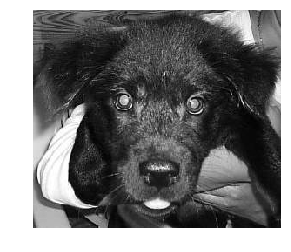

In [17]:
# wczytujemy zdjęcie
image_index = 12856
test_image = img_to_array(load_img(full_images[image_index]))

# uśredniamy wymiar RGB
test_image_gr = test_image.mean(axis=_)

# wyświetlamy
plt.imshow(test_image_gr, cmap='gray')

# aby pozbyć się indeksów pikseli na osiach:
plt.axis('off')

### Przykłady różnych splotów

Każdy splot to operacja na obrazie oraz filtrze, poniżej zobaczycie kilka przykładów filtrów oraz tego jaki efekt daje splecienie ich z psim pyszczkiem na obrazie.

(-0.5, 2.5, 2.5, -0.5)

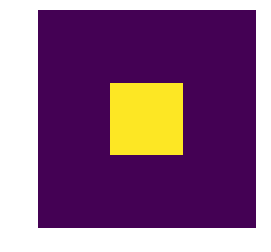

In [19]:
# tworzymy filtr - jest to macierz wartości liczbowych
kernel1 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
# wyświetlamy filtr - używamy imshow do wyświetlenia macierzy jako obrazu
plt.imshow(kernel1)
plt.axis('off')

Wczytujemy `convolve2d` ze scipy aby móc wykonać splot.

In [20]:
from scipy.signal import convolve2d

Jako argumenty do `convolve2d` podajemy:
* pierwszy to obrazek czarno-biały psiego pyszczka (obraz, który chcemy spleść z filtrem)
* drugi podajemy utworzony filtr (`krenel1`):

(-0.5, 286.5, 251.5, -0.5)

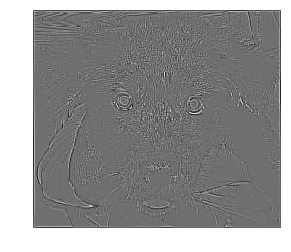

In [13]:
convolved_image1 = convolve2d(__________, _______)

plt.imshow(convolved_image1, cmap='gray')
plt.axis('off')

(-0.5, 2.5, 2.5, -0.5)

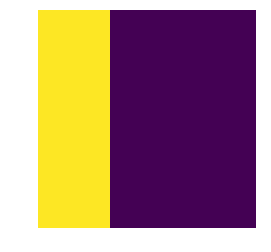

In [20]:
kernel2 = np.array([[2, -1, -1],
                    [2, -1, -1],
                    [2, -1, -1]])
plt.imshow(kernel2)
plt.axis('off')

(-0.5, 286.5, 251.5, -0.5)

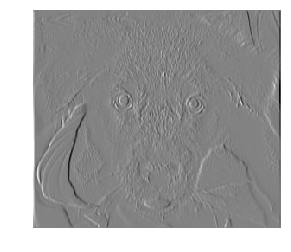

In [21]:
convolved_image2 = convolve2d(__________, kernel2)

plt.imshow(convolved_image2, cmap=_____)
plt.axis('off')

(-0.5, 3.5, 3.5, -0.5)

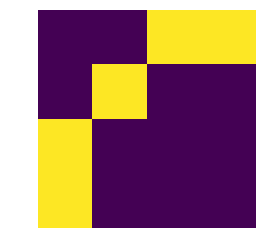

In [16]:
kernel3 = np.array([[-1, -1, 2, 2],
                   [-1, 2, -1, -1],
                   [2, -1, -1, -1],
                   [2, -1, -1, -1]])
plt.imshow(kernel3)
plt.axis('off')

(-0.5, 287.5, 252.5, -0.5)

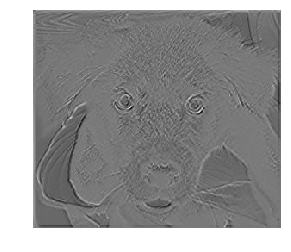

In [17]:
convolved_image3 = convolve2d(________, kernel3)

plt.imshow(_______________, cmap=______)
plt.axis('off')

Zauważ że ten ostatni filtr dosyć silnie reaguje na okolice oczu:

(-0.5, 287.5, 252.5, -0.5)

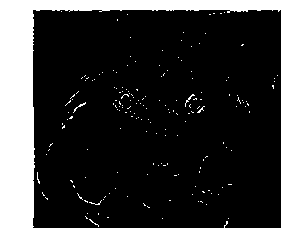

In [18]:
# wyświetlamy tylko wysokie wartości efektu ostatniego splotu
plt.imshow(convolved_image3 > 220, cmap='gray')
plt.axis('off')

### Zestawienie filtrów i efektów splotu 2d

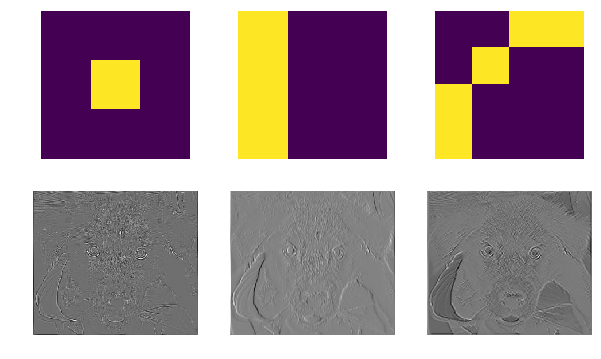

In [22]:
# tworzymy zestawienie wszystkich filtrów i efektów na jednym wykresie
# najpier tworzymy same wykres, składający się z kilku paneli
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# uzupełniamy pierwszy wiersz
ax[0, 0].imshow(kernel1)
ax[0, 1].imshow(kernel2)
ax[0, 2].imshow(kernel3)

# uzupełniamy drugi wiersz
ax[1, 0].imshow(convolved_image1, cmap='gray')
ax[1, 1].imshow(convolved_image2, cmap='gray')
ax[1, 2].imshow(convolved_image3, cmap='gray')

# wyłączamy oznaczenia osi dla wszystkich paneli
for a in ax.ravel():
    a.axis('off')

W jaki sposób splot może się przydać w analizie obrazu? Poszczególne filtry możemy traktować jako detektory prostych cech - poprzez wykonanie splotu dowiadujemy się jakie jest nasilenie tych cech w różnych miejscach obrazu. Sieć może nauczyć się takich wag filtrów, które pomagają w klasyfikacji obrazu.  
Warto wiedzieć i pamiętać, że:
* zastępujemy teraz proste neurony połączone na zasadzie każdy z każdym operacją splotu. U podstaw tego leży przekoananie, że nie ma potrzeby tworzyć oddzielnych połączeń dla lewego dolnego obrazu i górnego prawego (na przykład) - pies w jednym i w drugim rogu powinien wyglądać podobie. W związku z tym chcemy znaleźć dobre detektory (filtry), którymi będziemy skanować całą przestrzeń obrazu
* każda warstwa sieci neuronowej nie składa się teraz z neuronów, ale z filtrów (o określonej wielkości np. 3 na 3 piksele). Sieć uczy się wag dla filtrów, ale danym filtrem skanujemy tak samo cały obraz (wykonujemy splot). Efekt splotu stanowi input dla kolejnej warstwy sieci.
* Oprócz wymiarów wysokości oraz szerokości obraz wejściowy ma również głębokość (warstwy czerwonego, zielonego i niebieskiego - RGB), więc faktycznie pierwsza warstwa sieci uczy się filtrów trójwymiarowych (obejmujących wysokość, szerokość oraz warstwy kolorystyczne).
* Każdy z filtrów jest splatany z obrazem wejściowym, a więc jeżeli pierwsza warstwa sieci składa się z 8 filtrów, to wykonujemy 8 różnych splotów i w efekcie kolejna warstwa sieci dostaje 8 przekształceń oryginalnego obrazu. Wymiary inputu jakie dostaje kolejna warstwa sieci to w tym wypadku `wysokość x szerokość x 8`. W związku z tym filtry z jakich składa się ta kolejna warstwa mają wagi `wysokość_filtra x szerokość_filtra x 8`.
* pierwsze warstwy sieci splotowej zwykle uczą się prostych detektorów - linii o różnej orientacji, kolejne warstwy korzystają z wykrytych linii aby wykrywać bardziej złożone krawędzie np. krzywizyny; kolejne natomiast zaczynają z nich budować kształty; i tak dalej - wraz z kolejnymi warstwami sieci rośnie złożoność tego, co wykrywają filtry, ponieważ kolejne filtry szukają pewnyc kombinacje filtrów z poprzedniej warstwy (tak łącząc dwa detektory półkola można stworzyć detektor koła). Poniżej graficzna reprezentacja tego zjawiska:  
<img src=http://vision03.csail.mit.edu/cnn_art/data/single_layer.png>
  
Powyżej widzimy też schemat architektury splotowej sieci neuronowej. Do tej pory omówiliśmy splot `Conv` od *convolution*, przy czym w skład sieci wchodzą jeszcze operacje typu *max-pooling*. Max pooling to całe szczęście bardzo prosta operacja redukująca wymiary danych wychodzących z poprzedniej warstwy sieci - dzielimy te dane na części, każda np. o wymiarach 3 na 3 i z każdej części bierzemy tylko wartość maksymalną. Przykład poniżej:  
<img src=https://qph.fs.quoracdn.net/main-qimg-8afedfb2f82f279781bfefa269bc6a90>
  
Widzimy, że dla części czerwonej maksymalna wartość to 6, dla części żółtej to 3 itd.  
Zauważ jeszcze tylko, że w pierwszym diagramie w tej komórce na samym końcu (ostatnie warstwy sieci) wykonujemy operację 'rozprostowania'/'rozwinięcia' (*flatten*) poprzedniej warstwy do ciągu wartości liczbowych. Ostatnie warstwy sieci opererują już w klasycznej formie neuronów połączonych na zasadzie każdy z każdym. Musimy w końcu po prostu zintegrować wszystkie własności wykryte przez nasze warstwy sieci i podjąć decyzję co przestrawia obraz (decyzja ta to aktywność neuronu/neuronów ostatniej warstwy sieci).

## Wczytujemy obrazy
Wczytujemy 10000 obrazów, po 5000 na kategorię (trening na wszystkich trwałby zbyt długo).

In [71]:
from emosie import load_images

X, y = load_images(img_dir, n_images=_____, resize=(__, __))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


Po wczytaniu dzielimy zdjęcia na treningowe i testowe. Mamy aż 10 000 obrazów, więc możemy na dane testowe przeznaczyć tylko 10% (moglibyśmy przeznaczyć jeszcze mniej, nawet 2%), 10% z 10 000 to i tak 1000 zdjęć:

In [48]:
X_train, X_test, y_train, y_test = train_test_split(_, _, test_size=___, random_state=23)

Wczytujemy najpierw znane nam z Keras obiekty: `Sequential` oraz `Dense`:

In [10]:
from keras.models import Sequential
from keras.layers import Dense

Do sieci typu CNN potrzebujemy dodatkowych rodzajów warstw `Conv2D` (warstwa splotowa), `MaxPooling2D` (opisany wcześniej *max pooling*) oraz `Flatten` (do rozwijania/rozprostowywanie sieci na końcu):

In [11]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

Zbudujemy teraz przykładowy model, którego zadaniem będzie klasyfikacja czy na zdjęciu jest pies czy kot. Wybór warstw i ich kolejność mogłyby być inne, nie sugerujcie się architekturą poniżej jako słuszną czy adekwatną do tego zadania - często trudno jest z góry przewidzieć jaka dokładnie architektura sieci będzie dobra do danego problemu. Nasza sieć będzie składać się z:
* pięciu warstw ukrytych, czterech splotowych oraz jednej 'gęstej' (połączenia każdy-z-każdym).
* pierwsze dwie warstwy splotowe będą składać się z 16 filtrów, każdy o rozmiarze 3 x 3 (plus głębokość). Funkcja aktywacyjna dla tych warstw to standardowo `relu`.
* po dwóch warstwach splotowych wykonujemy max pooling, dzieląc obraz na segmenty 3 x 3 i dla każdego wybierając maximum
* następnie dodajemy dwie kolejne warstwy splotowe, tym razem każda składająca się z 32 filtrów, kazdy o rozmiarze 3 x 3
* znów stosujemy max pooling, tym razem dzielimy jednak dane na mniejsze segmenty - 2 na 2
* na koniec rozwijamy poprzednią wartwę w jeden wektor (*flatten*) oraz dodajemy zwykłą warstwę z 64-ema neuronami
* warstwa wyjściowa to już tylko jeden neuron, który mówi nam czy na zjęciu jest pies czy nie

Pamiętaj, że architekturę tej sieci można zmieniać na różne sposoby, co może przełożyć się np. na poprawę klasyfikacji (proponowany projekt na zakończenie zajęć to np. zabawa parametrami sieci). W ciągu ostatnich kilku lat badacze sieci neuronowych z całego świata przetestowali wiele różnych architektur, które prowadziły do coraz lepszej poprawności rozpoznawania obrazów oraz coraz lepszego zrozumienia dlaczego pewne architektury mogą działać lepiej a inne gorzej (przy czym mówię tutaj o architekturach w trochę szerszym kontekście - badano wiele pomysłów wykraczających poza ilość warstw i kolejność ich ułożenia).

In [12]:
model = Sequential()

# tworzymy dwie warstwy splotowe, następnie max pooling
model.add(Conv2D(16, (3, 3), input_shape=(50, 50, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# tworzymy kolejne dwie warstwy splotowe, następnie max pooling
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# na koniec 'prostujemy' wszystkie filtry do jednego wektora i dodajemy 64 zwykłe neurony
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# i neuron wyjściowy, który mówi pies (1) albo kot (0)
model.add(Dense(1, activation='sigmoid'))

# i kompilujemy tak jak zwykle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
__________

Zauważ, że sieć ma w sumie ponad 68 tysięcy parametrów (wag filtrów oraz wag połączeń) - a na współczesne standardy zbudowaliśmy dosyć małą sieć.

Trening dużej sieci na komputerze bez wspomagania GPU będzie trwał długo, z tego względu ustawimy liczbę epok tylko na `10`. Oprócz czasu oczekiwania przy tej liczbie parametrów (względem obrazków używanych w treningu) przy wielu epokach możemy łatwo przetrenować sieć doprowadzając do świetnej poprawności na danych treningowych, ale słabej na danych testowych. I tak ryzyko przetrenowania jest całkiem możliwe ponieważ nie stosujemy żadnej regularyzacji (o tym później).

In [14]:
history = model.fit(________, y_train, epochs=__)

Epoch 1/10
9000/9000 [==============================] - 53s 6ms/step - loss: 0.8588 - acc: 0.5609
Epoch 2/10
9000/9000 [==============================] - 51s 6ms/step - loss: 0.6553 - acc: 0.6142: 4s -
Epoch 3/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.6269 - acc: 0.6450
Epoch 4/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.6000 - acc: 0.6749
Epoch 5/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.5660 - acc: 0.7049
Epoch 6/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.5455 - acc: 0.7252
Epoch 7/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.5215 - acc: 0.7429
Epoch 8/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.4899 - acc: 0.7603
Epoch 9/10
9000/9000 [==============================] - 51s 6ms/step - loss: 0.4649 - acc: 0.7766
Epoch 10/10
9000/9000 [==============================] - 52s 6ms/step - loss: 0.4293 - acc: 0.7997


UWAGA! jeżeli przez wiele epok masz cały czas poprawność 50% (np. `acc: 0.5001`) zbuduj sieć jeszcze raz tzn. uruchom ponownie komórkę budującą sięc (możesz przerwać pracę notebook'a poprzez `kernel -> interrupt`) i zacznij trenować ponownie. Może się zdarzyć, że sieć przy niekorzystnej inicjalizacji wag się trochę 'przytka'.  
Zauważ że już po drugim przejściu przez dane (epoce) poprawność wynosi ponad 60% i stosunkowo szybko rośnie w kolejnych przejściach. To niestety może być zbyt piękne aby było prawdziwe - może to sugerować że sieć zapamiętuje przykłady zamiast wyuczyć się wzorców pomagających rozpoznać psy i koty. 
Może jednak być tak, że trenowana przez Ciebie sieć stopniowo się uczy i nie osiąga szybko poprawności powyżej 90% - to z kolei znak, że trening może trwać trochę dłużej, a sieć uczy się sprawnie.
Sprawdźmy to - zobaczmy jaką mamy poprawność na danych treningowych i testowych (jeżeli na testowych poprawność jest dużo niższa to mamy do czynienia z przetrenowaniem tzn *overfitting*). Skorzystamy tym razem z wygodnej metody sieci `.evaluate()`, której podajemy dane oraz prawdziwe odpowiedzi, a która zwraca nam koszt dla sieci oraz poprawność (nas będzie interesować tylko poprawność):

In [ ]:
plt.plot(history.history['acc'])
plt.ylabel('Accuracy')

print('Poprawność na danych treningowych:')
print(model.evaluate(_______, y_train)[1])

print('\nPoprawność na danych testowych:')
print(model.evaluate(X_test, _______)[1])

Poprawność na danych treningowych:
9000/9000 [==============================] - 20s 2ms/step
0.8388888888888889

Poprawność na danych testowych:
1000/1000 [==============================] - 2s 2ms/step
0.74


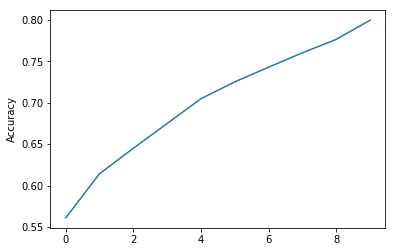

In [16]:
# DEL

Poprawność na danych testowych jest znacząco wyższa od 50%, więc model nauczył się czegoś. W przypadku powyżej widzimy również że poprawność na danych testowych nie odbiega bardzo od poprawności dla danych treningowych.  
Spróbujemy w związku z tym trenować sieć dalej. Aby ułatwić sobie tym razem pracę wydzielimy 4% danych treningowych (tzn 0.04 * 9000, a więc 360 zdjęć) na niezależny zbiór walidacyjny - na tym zbiorze zdjęć nie uczymy sieci, korzystamy z niego za to na bierząco aby monitorować poprawność sieci na niezależnych danych w trakcie treningu. W momencie gdy poprawność dla tych niezależnych danych przestanie się poprawiać - przerwiemy trening.
* aby móc przerwać trening wcześniej, zaimportujemy `EarlyStopping` i utworzymy `stop_early` ustawiając `patience` z `EarlyStopping` na `2` (tzn. przerwiemy trening gdy przez dwie kolejne epoki nie uzyskamy lepszej poprawności na danych walidacyjnych
* Nastepnie ustaw `validation_split` w `model.fit` na odpowiednią wartość
* Dodaj `stop_early` jako callback, ustaw w tym celu argument `callbacks` w `model.fit`. `callbacks` zawsze przyjmuje listę, więc jeżeli podajesz tylko jeden callback, pamiętaj o tym aby go opakować w listę (tzn. np. zamiast `jakiś_callback` podajemy `[jakiś_callback]`

In [74]:
from keras.callbacks import EarlyStopping
stop_early = EarlyStopping(patience=_)

In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_split=____, callbacks=__________)

Train on 8640 samples, validate on 360 samples
Epoch 1/10
8640/8640 [==============================] - 50s 6ms/step - loss: 0.4017 - acc: 0.8145 - val_loss: 0.4160 - val_acc: 0.8056
Epoch 2/10
8640/8640 [==============================] - 50s 6ms/step - loss: 0.3641 - acc: 0.8356 - val_loss: 0.4217 - val_acc: 0.7917
Epoch 3/10
8640/8640 [==============================] - 50s 6ms/step - loss: 0.3302 - acc: 0.8530 - val_loss: 0.4261 - val_acc: 0.7944


Trening został przerwany ponieważ poprawność na danych validacyjnych przestała rosnąć. Zobaczmy jak nasz model sprawuje się teraz. Najpierw, tak jak wcześniej, sprawdzimy poprawnośc na danych testowych i treningowych:

In [19]:
train_corr = model.evaluate(X_train, y_train)[1]
print('Poprawność na danych treningowych:')
print(train_corr)

test_corr = model.evaluate(X_test, y_test)[1]
print('\nPoprawność na danych testowych:')
print(test_corr)

9000/9000 [==============================] - 20s 2ms/step
Poprawność na danych treningowych:
0.8643333333333333
1000/1000 [==============================] - 2s 2ms/step

Poprawność na danych testowych:
0.718


Zwróć uwagę na to, że dalszy trening podniósł poprawność na danych treningowych, ale nie na testowych.
Jest to objaw tego, że sieć zaczęła się przetrenowywać - później spróbujemy temu zapobiec dodając do sieci regularyzację.  
Zanim przejdziemy do tego kroku sprawdźmy kilka przykładów, które sieć rozpoznaje poprawnie i kilka rozpoznanych niepoprawnie:

In [50]:
# weźmy 25 pierwszych zdjęć testowych:
test_sample = X_test[:25]
predictions = model.predict(test_sample)
true_labels = y_test[:25]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


(-0.5, 49.5, 49.5, -0.5)

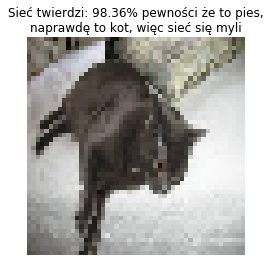

In [66]:
check_idx = 9
plt.imshow(test_sample[check_idx] / 255)

# ! UWAGA, poniżej możesz spotkać czarną magię, nie przejmuj się tym !
text = 'Sieć twierdzi: {:.2f}% pewności że to pies,\nnaprawdę to {}, więc sieć {}'
poprawna_odpowiedź = true_labels[check_idx]
naprawdeto = ['kot', 'pies'][poprawna_odpowiedź]
sieć_twierdzi = predictions[check_idx, 0]
czy_ma_rację = np.abs(sieć_twierdzi - poprawna_odpowiedź) < 0.5

plt.title(text.format(sieć_twierdzi * 100., naprawdeto, ['się myli', 'ma rację'][czy_ma_rację]))
plt.axis('off')

Używając kodu powyżej sprawdzaj przykłady aż znajdziejsz trzy błędnie zaklasyfikowane zdjęcia. Czy masz jakieś pomysły dlaczego sieć błędnie zaklasyfikowała te zdjęcia? (przykład takiej spekulacji - psy mogą być częściej fotografowane przez siatkę/ogrodzenie, więc obecność tego rodzaju wzoru może przekonywać sieć do tego, że mamy do czynienia z psem, nawet gdy zdjęcie przedstawia kota; podobnie mogą na predykcję wpłynąć inne cechy otoczenia, np. koty częściej pewnie fotografowane są w domach, więc kot sfotografowany na zewnątrz może zostać uznany za psa). Pamiętajmy, że sieć nie wie co "na prawdę" przedstawiają zdjęcia, więc różne cechy obrazu skorelowane z obecnością psa, ale nie sygnalizujące jego obecności mogą ją czasem zmylić, a nie naprowadzić.  
Widzimy, że sieć generalnie radzi sobie nieźle, ma poprawność powyżej 70%, chociaż człowiek oczywiście dałby sobie radę dużo lepiej (poprawność człowieka byłaby pewnie w okolicach 99% - niektóre zdjęcia przy rozdzielczości 50 x 50 mogą i człowiekowi sprawić problem). Ale ludzie uczą się w interaktywnym, trójwymiarowym środowisku, a sieć uczyła się z wartości pikseli. :)

## Czego nauczyła się nasza sieć?

Zwizualizujemy teraz kilka filtrów pierwszej warstwy, których nauczyła się sieć. Wygenerujemy też obrazy, które maksymalizują aktywność danego filtra, wybranej warstwy. Do tego drugiego zadania potrzebna będzie biblioteka `keras-vis`, którą zainstalujecie przez:
```
pip install keras-vis
```
(albo `!pip install keras-vis` w notebook'u)

In [68]:
!pip install keras-vis

jupyterlab-launcher 0.10.5 has requirement jsonschema>=2.6.0, but you'll have jsonschema 2.5.1 which is incompatible.


Najpierw wyświetlmy wagi filtrów pierwszej warstwy sieci. Nasza sieć neuronowa, obecna w zmiennej `model`, posiada argument `layers`, w którym znajdziemy wszystkie warstwy sieci:

In [69]:
model.layers

Aby znaleźć wagi filtrów pierwszej warstwy musimy:
* wybrać tę warstwę z listy (normalnym indeksowaniem)
* użyć na wyniku metody `get_weights()` (bez argumentów)
* `get_weights` zwraca nam listę dwóch elementów: wagi filtrów, wartość spoczynkowa filtrów (to tak samo jak wartość spoczynkowa neuronu). W związku z tym wybierzemy pierwszy element, czyli wagi filtrów.

In [74]:
pierwsza_warstwa = model.______[_]
wagi = pierwsza_warstwa.___________()[_]

Wagi powinny mieć kształt `3 x 3 x 3 x 16` (*wysokość* x *szerokość* x *głębokość (RGB)* x *liczba filtrów*):

In [79]:
wagi.shape

(3, 3, 3, 16)

Rysujemy filtry, uśredniając wymiar RGB (aby były prostsze w interpretacji) - musisz uzupełnić poniższy kod o jeden znak:

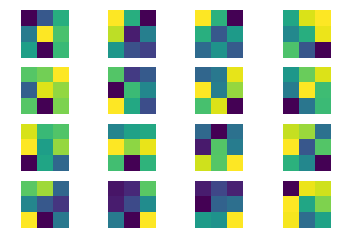

In [94]:
fig, ax = plt.subplots(nrows=4, ncols=4)
ax = ax.ravel()

for idx in range(len(ax)):
    # musisz podać wymiar, który uśredniamy, pamiętaj że pojedynczy
    # filtr ma wymiary wysokość na szerokość na RGB
    średnie_wagi = wagi[..., idx].mean(axis=_)
    ax[idx].imshow(średnie_wagi)
    ax[idx].axis('off')

Pojedyncze filtry często jednak nie są łatwe w interpretacji, aby lepiej zrozumieć na co czułe są poszczególne filtry stosuje się często technikę będącą odwrotnością treningu sieci neuronowej: zmieniamy pixele obrazu tak, aby maksymalizować aktywność jakiegoś filtra. Technika ta jest dostępna w ramach `keras-viz`, skorzystamy z niej poniżej:

In [4]:
from vis.visualization import visualize_activation
from keras import activations
from emosie import apply_modifications

# Aby móc sprawnie tworzyć obrazy maksymalizując aktywność
# sieci musimy zamienić aktywnośc interesującej nas warstwy
# z relu na liniową:
layer_idx = 0
model.layers[layer_idx].activation = activations.linear
model = apply_modifications(model)

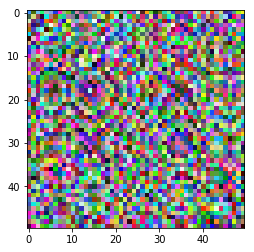

In [229]:
img = visualize_activation(model, 0, filter_indices=1, max_iter=250, input_range=(0., 255.),
                           tv_weight=0.06, lp_norm_weight=0.5)
plt.imshow(img)

Widzimy że filtr o indeksie 1 (czyli drugi), preferuje pozakręcane kształty.

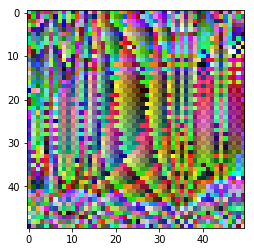

In [227]:
img = visualize_activation(model, 0, filter_indices=2, max_iter=250, input_range=(0., 255.),
                           tv_weight=0.06, lp_norm_weight=0.7)
plt.imshow(img)

Filtr trzeci z kolei woli proste linie. Wyświetlmy sobie wszystkie filtry (uwaga na czarną magię!):

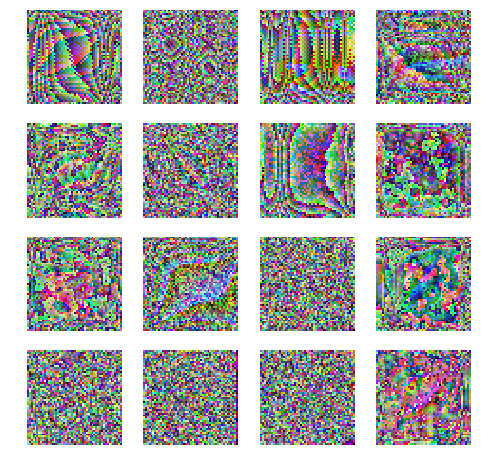

In [234]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
ax = ax.ravel()

for idx in range(16):
    img = visualize_activation(model, 0, filter_indices=idx, max_iter=250, input_range=(0., 255.),
                               tv_weight=0.06, lp_norm_weight=0.7)
    ax[idx].imshow(img)
    ax[idx].axis('off')

Nie wszystkie obrazki wyglądają sensownie - może to wynikać z tego, że
dla niektórych proces zmian wartości pikseli celem maksymalizacji pobudzenia filtra
mógł nie przebiec poprawnie. Gdyby nam się chciało moglibyśmy spróbować poprawić
ten proces, niestety wymaga to ręcznego sprawdzania różnych wartości regularyzacji
dla metody `visualize_activations`, nie opłaca nam się to teraz.  
Spróbujmy zrobić to samo dla warstwy drugiej, najpierw jednak:
* zamienimy aktywację pierwszej warstwy ponownie na `relu`
* zmieniemy aktywację drugiej warstwy na liniową (tak jak wcześniej dla pierwszej) - to konieczne aby generowanie obrazu przebiegało poprawnie

In [6]:
model.layers[0].activation = activations.relu
model.layers[1].activation = activations.linear
model = apply_modifications(model)

(-0.5, 49.5, 49.5, -0.5)

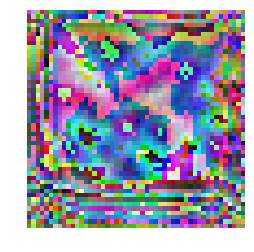

In [26]:
img = visualize_activation(model, 1, filter_indices=6, max_iter=250, input_range=(0., 255.),
                           tv_weight=0.045, lp_norm_weight=1.5)
plt.imshow(img)
plt.axis('off')

(-0.5, 49.5, 49.5, -0.5)

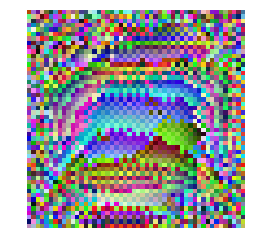

In [24]:
img = visualize_activation(model, 1, filter_indices=5, max_iter=250, input_range=(0., 255.),
                           tv_weight=0.035, lp_norm_weight=1.)
plt.imshow(img)
plt.axis('off')

Nudzą nas już trochę te dziwne wzorki, w związku z czym spróbujemy wygenerować teraz najbardziej 'psi' obraz wg. sieci.

In [27]:
model.layers[1].activation = activations.relu
model.layers[-1].activation = activations.linear
model = apply_modifications(model)

(-0.5, 49.5, 49.5, -0.5)

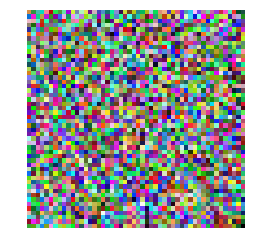

In [46]:
last_layer_idx = len(model.layers) - 1

img = visualize_activation(model, last_layer_idx, filter_indices=0, max_iter=500, input_range=(0., 255.))
plt.imshow(img)
plt.axis('off')

Niespodzianka, nasza sieć jest przekonana, że że kociokwik na powyższym obrazku to pies! Aby obraz był bardziej sensowny możemy pobawić się parametrami regularyzacji `tv_weight` oraz `lp_norm_weight`, ale nie byłem w stanie uzyskać czegoś sensownego.  
Sprawdźmy pobudzenie ostatniego neuronu sieci dla takiego obrazu:

In [58]:
# sprawdzamy, czy ostatni neuron sieci rzeczywiście jest silnie aktywowany przez ten obrazek:
model.predict(img[np.newaxis, :])

array([[65.16727]], dtype=float32)

Neuron jest silnie pobudzony (zmieniliśmy jego pobudzenie z typu sigmoid do liniowego dlatego wartość wynosi dużo ponad 1, inaczej wynosiłaby coś powyżej 0.99).

## Regularyzacja sieci
Spróbujemy teraz poprawić działanie sieci poprzez regularyzację. Budujemy całą sieć tak samo jak wcześniej, dodajemy jednak:
* `Dropout` do jednej z ostatnich warstw.
* `BatchNormalization` pomiędzy warstwy splotowe (`Conv2d`)  

Dropout to prosty sposób regularyzacji - z danej warstwy losowo co pewien czas usuwana jest część neuronów. Prowadzi to do dużo wolniejszego uczenia się, ale zapobiega sytuacji w której neurony bądź ich kombinacje zapamiętują konkretne przykłady treningowe. 
`Dropout(0.25)` prowadzi do wyrzucenia 25% neuronów przy każdym etapie treningowym. W naszym wypadku chcemy odrzucać 50% neuronów przy treningu.  
`BatchNormalization` to z kolei metoda normalizacji danych idących z jednej warstwy do kolejnej, która zwykle poprawia uczenie się sieci, dodajemy w tym wypadku poprzez podanie `BatchNormalization()` do `model.add()`.

### Ćwiczenie
Zaimportuj Dropout i BatchNormalization z `keras.layers`:

In [59]:
from _____._______ import ________, ___________________

In [66]:
model = Sequential()

# tworzymy dwie warstwy splotowe, następnie max pooling
model.add(Conv2D(16, (4, 4), input_shape=(50, 50, 3), activation='relu'))

# # ! TUTAJ ĆWICZENIE, BRAKUJĄCA LINIJKA !
model.add(_______________())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# tworzymy kolejne dwie warstwy splotowe, następnie max pooling
model.add(Conv2D(32, (3, 3), activation='relu'))

# # ! TUTAJ ĆWICZENIE, BRAKUJĄCA LINIJKA !
model.add(_______________())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# na koniec 'prostujemy' wszystkie filtry do jednego wektora i dodajemy 64 zwykłe neurony
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# ! TUTAJ ĆWICZENIE, BRAKUJĄCA LINIJKA !
model.add(_______(___))

# i neuron wyjściowy, który mówi pies (1) albo kot (0)
# zwróć uwagę, że zamiast activ
model.add(Dense(1, activation='sigmoid'))

# i kompilujemy tak jak zwykle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Regularyzacja prowadzi do dużo wolniejszego uczenia się, dlatego tym razem będziemy trenować przez więcej epok - co najmniej 20. Używamy też, podobnie jak poprzednio, 4% danych do walidacji oraz chcemy aby trening zakończył się gdy przez cztery epoki nie odnotowujemy poprawy (tym razem cztery - ponieważ trening będzie dla sieci dużo trudniejszy z regularyzacją).  
Trening trochę potrwa, także cierpliwości...

In [76]:
stop_early = EarlyStopping(patience=_)
history = model.fit(X_train, y_train, epochs=__, validation_split=____, callbacks=[stop_early])

Train on 8640 samples, validate on 360 samples
Epoch 1/20
8640/8640 [==============================] - 71s 8ms/step - loss: 0.5210 - acc: 0.7466 - val_loss: 0.5116 - val_acc: 0.7472
Epoch 2/20
8640/8640 [==============================] - 71s 8ms/step - loss: 0.4899 - acc: 0.7655 - val_loss: 0.5373 - val_acc: 0.7194
Epoch 3/20
8640/8640 [==============================] - 71s 8ms/step - loss: 0.4705 - acc: 0.7750 - val_loss: 0.4378 - val_acc: 0.7944
Epoch 4/20
8640/8640 [==============================] - 101s 12ms/step - loss: 0.4314 - acc: 0.8027 - val_loss: 0.4714 - val_acc: 0.7833
Epoch 5/20
8640/8640 [==============================] - 102s 12ms/step - loss: 0.4148 - acc: 0.8166 - val_loss: 0.4294 - val_acc: 0.7833
Epoch 6/20
8640/8640 [==============================] - 101s 12ms/step - loss: 0.3935 - acc: 0.8230 - val_loss: 0.4530 - val_acc: 0.8056
Epoch 7/20
8640/8640 [==============================] - 100s 12ms/step - loss: 0.3630 - acc: 0.8392 - val_loss: 0.4822 - val_acc: 0.7750


Widać, że wraz z kolejnymi epokami poprawność sieci rośnie liniowo dla danych treningowych natomiast dla danych validacyjnych obserwujemy znaczną zmienność z tendencją do poprawy poprawności (i kosztu tzn `val_loss`). Sieć jednak nie osiąga na danych walidacyjnych poprawności wyższej niż 84% (do tego musielibyśmy zbudować pewnie większą sięć). Trening kończy się przed upływem 20 epok ponieważ nie obserwujemy już poprawy. Możemy teraz sprawdzić poprawność na danych testowych. Ale wcześniej - wykres zmian w poprawności na danych treningowych oraz walidacyjnych:

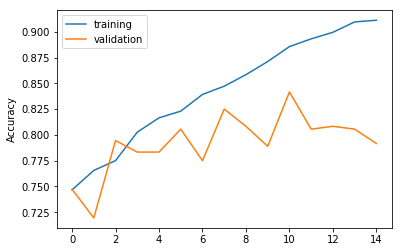

In [77]:
plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='validation')
plt.ylabel('Accuracy')
plt.legend()

In [78]:
train_corr = model._______(_____, _______)[1]
print('Poprawność na danych treningowych:')
print(_____________)

test_corr = model._______(_____, _______)[1]
print('\nPoprawność na danych testowych:')
print(_____________)

9000/9000 [==============================] - 40s 4ms/step
Poprawność na danych treningowych:
[0.23260115860568154, 0.9066666666666666]
1000/1000 [==============================] - 5s 5ms/step

Poprawność na danych testowych:
[0.6320099096298217, 0.787]


Korzystając z reguralyzacji dochodzimy do poprawności nieco powyżej 78%, prawie 80%. To znacząca poprawa, jednak cały czas jesteśmy daleko od poprawności człowieka. Widzieliśmy jednak, że sieci nie rozumieją obrazu tak jak my - obraz będący dla nas niezrozumiałym szumem potrafi przekonać sieć, że ma do czynienia z psem. Podobnie moglibyśmy oszukać tę sieć, którą wytrenowaliśmy teraz z regularyzacją. Sprawdzimy tylko, jaką daje predykcje dla wcześniej utworzonego obrazu `img`, który oszukiwał naszą poprzednią sieć:  

In [79]:
model.predict(img[np.newaxis, ...])

array([[0.991863]], dtype=float32)

Jak widzimy, również nasz nowy model daje się nabrać. Twierdzi, że poniższy obrazek to na 99% pies:

(-0.5, 49.5, 49.5, -0.5)

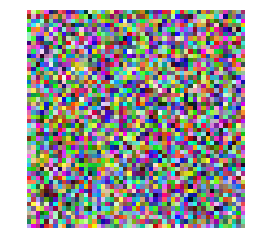

In [80]:
plt.imshow(img)
plt.axis('off')

To cały czas nie jest model, z którego bylibyśmy zadowoleni w praktyce, ale jak na zabawę na słabym komputerze jest ok. Do wyższej poprawności potrzebowalibyśmy też więcej danych - tzn. wczytania wszystkich 25 000 zdjęć. Moglibyśmy też zredukować skalowanie (obecnie skalujemy wszystkie zdjęcia do rozmiaru 50 na 50 pikseli - w takim rozmiarze niektóre zdjęcia będą trudne do zidentyfikowania.  
Z `25 000` zdjęć można zresztą w praktyce zrobić nawet pół miliona - obracając, skalując i przycinając zdjęcia (można to robić automatycznie z wykorzystaniem `keras.preprocessing.image.ImageDataGenerator`. Taka liczba przykładów doprowadziłaby naszą sieć do dużo lepszej poprawności.  
Inną strategią jest skorzystanie z sieci wcześniej wytrenowanej na milionach zdjęć (jest sporo takich dostępnych publicznie - wliczając kilka bardzo znanych architektur) i dokleić do jej ostatnich pięter kilkaset neuronów pozwalających na klasyfikację pies vs kot. Wtedy trening odbywałby się na takiej hybrydowej sieci - duża część zastygła, wytrenowana już wcześniej, a tylko końcowa warstwa (albo warstwy) są trenowane z wykorzystaniem posiadanych danych. Tego rodzaju strategię nazywa się *transfer learning*, to już ostatnich naszych zmagań z analizą obrazu. Nie skorzystamy tutaj w pełni z *transfer learning* - a tylko zobaczymy na ile pomocne są gotowe sieci wytrenowane na milionach obrazów.

## Transfer learning
Skorzystamy z sieci ResNet50, którą wraz z wagami możemy ściągnąć z sieci korzystając z biblioteki Keras:

In [81]:
from keras.applications import ResNet50

resnet_model = ResNet50()

W moim przypadku wagi sieci nie są pobierane, ponieważ ściągnąłem je wcześniej. Ściąganie wag sieci może potrwać 1-8 minut (w zależności od prędkości połączenia).  
Sieć `ResNet50` jest olbrzymia, w porównaniu do wytrenowanej przez nas kilkuwarstwowej sieci, zobaczmy sobie podsumowanie:

In [82]:
resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

Ile parametrów ma w sumie sieć (znajdziesz tę informację na dole opisu)? Podpowiedź: ilość parametrów tutaj już liczymy w milionach. Tego rodzaju sieci trenuje się na wielu rdzeniach i wielu GPU całymi dniami (a czasem tygodniami) na milionach zdjęć.
Sieć jest wytrenowana na bazie `ImageNet`, która liczy sobie 14 milionów obrazów, a zadaniem sieci jest identyfikacja 1000 różnych rodzajów obiektów (między innymi ludzi, samochodów, zwierząt, pożywienia itp.). Pośród zwierząt sieć musi nie tylko rozstrzygać między kotami i psami, ale rozróżniać kilka gatunków psów i kotów. Sieć wytrenowana na tej bazie jest więc idealna do naszego zadania.  
Zanim jednak z niej skorzystamy, musimy przetworzyć inaczej nasze zdjęcia - baza `ImageNet` składa się ze zdjęć o innej rozdzielczości (`224 x 224`). W dodatku obrazy te są trochę inaczej przetwarzane dla sieci `ResNet`. Musimy więc wczytać dane ponownie.

In [83]:
X, y = load_images(img_dir, n_images=10000, resize=(__, __))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


Jeżeli macie problemy z RAMem - możecie wczytać odpowiednio mniej zdjęć (na przykład 50000).

In [85]:
data_size_MB = X.size * X.itemsize / 1000000
print('Dane mają teraz {} MB'.format(data_size_MB))

Dane mają teraz 6021.12 MB


Przetworzymy teraz dane tak aby pasowały do formatu ResNet50:

In [86]:
from keras.applications.resnet50 import preprocess_input

X = preprocess_input(X)

Sprawdźmy predykcje sieci dla kilku obrazków: `1543` oraz `5623`. Najpierw zobaczmy te obrazki:

(-0.5, 223.5, 223.5, -0.5)

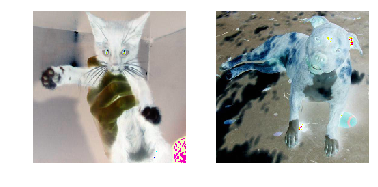

In [150]:
fig, ax = plt.subplots(ncols=2)

# przetwarzamy obraz z powrotem do normalnego zakresu wartości 0 - 255
this_im = images + np.array([[[[103.939, 116.779, 123.68]]]])
this_im[this_im < 0] = 0
this_im[this_im > 255] = 255

ax[0].imshow(this_im[0][..., ::-1])
ax[0].axis('off')
ax[1].imshow(this_im[1][..., ::-1])
ax[1].axis('off')

Mimo wszystko obrazy nie wyglądają tak jak powinny (nie wiem do końca dlaczego) , ale trudno - daje się rozpoznać, że po lewej jest kot a po prawej pies. Zobaczmy jakie predykcje daje sieć ResNet dla tych obrazów:

In [151]:
preds = resnet_model.predict(images)

`preds` to teraz macierz o dwóch wierszach i 1000 kolumn. Wiersze to predykcje dla kolejnych obrazów, a kolumny to kategorie predykcji (ImageNet to zadanie, w którym sieć klasyfikuje obrazy jako należące do jednej z 1000 kategorii). Wyświetlmy sobie każdą predykcję jako linię:

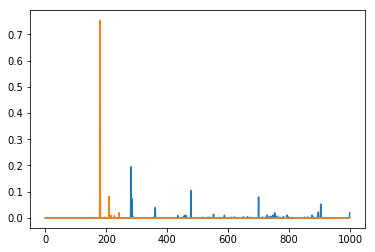

In [153]:
plt.plot(preds.T)

Aby zrozumieć co znaczy, która kategoria skorzystamy z funkcji `decode_predictions`, podając jej macierz `preds`. Poprosimy tę funkcję również o podanie nazw klas tylko dla 5 klas o najwyższej pewności (dla każdej predykcji).

In [154]:
from keras.applications.resnet50 import decode_predictions

labels = decode_predictions(preds, top=5)

Mamy teraz przetłumaczone predykcje w zmiennej `labels`. Zobaczmy jakie predykcje dała sieć dla pierwszego obrazu (kota):

In [155]:
labels[0]

[('n02123045', 'tabby', 0.1946047),
 ('n02971356', 'carton', 0.10414422),
 ('n03887697', 'paper_towel', 0.079770684),
 ('n02124075', 'Egyptian_cat', 0.0728737),
 ('n02123159', 'tiger_cat', 0.06724474)]

tabby to kot pręgowany, czyli sieć rozpoznaje kota. Co prawda tylko 19% przypada na kota pręgowanego, a 10% już na karton (następnie 8% na ręcznik papierowy - pewnie ze względu na jasny kolor oraz ludzką dłoń). A jak wygląda predykcja dla drugiego zdjęcia?

In [156]:
labels[1]

[('n02093428', 'American_Staffordshire_terrier', 0.7536513),
 ('n02093256', 'Staffordshire_bullterrier', 0.10232209),
 ('n02099849', 'Chesapeake_Bay_retriever', 0.081988454),
 ('n02108089', 'boxer', 0.01993745),
 ('n02101388', 'Brittany_spaniel', 0.009274933)]

75% dla Amerykańskiego staffordshire terier'a, czyli poprawna odpowiedź. Widzimy, że sieć radzi sobie całkiem nieźle w rozpoznawaniu interesujących nas zwierzaków. Jak ją wykorzystać do naszych celów? Mamy dwie możliwości:
* korzystamy z sieci tak jak teraz działa i zbieramy % pewności wewnątrz kategorii psów i wewnątrz kategorii kotów i sprawdzamy czy w sumie kot czy pies ma wyższy procent
* odcinamy ostatnią warstwę sieci (1000 neuronów odpowiadających kategoriom) i doklejamy jeden (pies vs kot), następnie trenujemy sieć na naszych zdjęciach. Przy czym - nie trenujemy wtedy całej sieci, ale tylko tę ostatnią doklejoną warstwę  

Z tego drugiego rozwiązania będziecie mogli skorzystać w projekcie / ćwiczeniu dodatkowym. Na razie koniec - i tak notebook wyszedł zbyt długi. :)